# Problem 4

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import math

In [19]:

Q4X_PATH = "Assignment/data/q4/q4x.dat"
Q4Y_PATH = "Assignment/data/q4/q4y.dat"

def normalize_x(x):
    mean = np.mean(x)
    variance = np.mean((x - mean) ** 2)
    standard_dev = np.sqrt(variance)
    x =  (x - mean) / standard_dev
    return x   
def read_input(): 
    x = (np.genfromtxt(Q4X_PATH , dtype = np.float64 , delimiter = '  ')).T
    data = np.genfromtxt(Q4Y_PATH, dtype = str, delimiter='\n')
    y = np.zeros(len(data), dtype = np.int64)
    y = (data == "Canada").astype(np.int64)
    return x , y


x , y = read_input()
x[0] = normalize_x(x[0])
x[1] = normalize_x(x[1])

In [20]:
phi = None
mu = np.zeros((2 , 2) , dtype = np.float64)
covariance = None
sigma0 = None
sigma1 = None
def compute_parameters(x  , y):
    global phi , covariance , sigma0 , sigma1
    phi = np.sum(y) / len(y)

    mu[0][0] = np.sum(x[0 , y == 0])/ (len(y) - np.sum(y))
    mu[1][0] = np.sum(x[1 , y == 0])/ (len(y) - np.sum(y))
    
    
    mu[0][1] = np.sum(x[0 , y == 1])/ np.sum(y)
    mu[1][1] = np.sum(x[1 , y == 1])/ np.sum(y)


    intermediate = x - mu[: , y]
    covariance =  np.matmul(intermediate , intermediate.T) / len(y)
  

    intermediate = x[: , y == 0] - mu[: , y[y == 0]]
    sigma0 = np.matmul(intermediate , intermediate.T) / (len(y) - np.sum(y))

    intermediate = x[: , y == 1] - mu[: , y[y == 1]]
    sigma1 = np.matmul(intermediate , intermediate.T) / np.sum(y)


compute_parameters(x , y)
print("phi:" , phi)
print("mean_0:", mu[: , 0])
print("mean_1:", mu[: , 1])
print("common covariance matrix: " , covariance)
print("sigma0:" , sigma0)
print("sigma1:" , sigma1)






phi: 0.5
mean_0: [-0.75529433  0.68509431]
mean_1: [ 0.75529433 -0.68509431]
common covariance matrix:  [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]
sigma0: [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
sigma1: [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


In [21]:

def draw_linear_decision_boundary(slope , intercept):
    plt.clf()
    plt.title("Problem 4: Gaussian Discriminant Analysis ") 
    plt.xlabel("x0")
    plt.ylabel("x1")

    plt.scatter(x[0 , y == 0], x[1 , y == 0] , marker = ".", facecolor = "red" , label = "Alaska / y(i) = 0")
    plt.scatter(x[0 , y == 1], x[1 , y == 1] , marker = "x", facecolor = "green" , label = "Canada / y(i) = 1")
    
    x0_separating = np.arange(-5, 5, 0.1)
    x1_separating = slope * x0_separating + intercept

    plt.plot(x0_separating, x1_separating, color = "blue" , label = "Linear decision boundary")
   
  

def draw_quadratic_decision_boundary(conic_x0_sq , conic_x1_sq , conic_x0_x1 , conic_x0 , conic_x1 , conic_const):
    mpl.rcParams["lines.color"] = "k"
    mpl.rcParams["axes.prop_cycle"] = mpl.cycler("color", ["k"])

    x0_vals = np.arange(-5, 5, 0.1)
    x1_vals = np.arange(-7, 7, 0.1)


    
    x0_mesh, x1_mesh = np.meshgrid(x0_vals, x1_vals)
    
    get_curve = lambda x0 , x1 : conic_x0_sq * (x0 ** 2) + conic_x1_sq * (x1 ** 2) + conic_x0_x1 * x0 * x1 + conic_x0 * x0 + conic_x1 * x1 + conic_const
    curve_mesh = get_curve(x0_mesh, x1_mesh)
    
    plt.contour(x0_mesh, x1_mesh, curve_mesh, levels = [0] , cmap = "Dark2" )



        
                
    

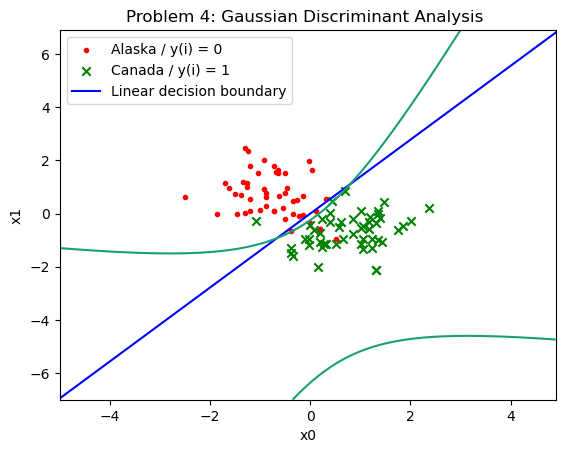

In [22]:



def compute_linear_separator():
    sigma_inverse = np.linalg.inv(covariance)

    a = np.matmul(sigma_inverse , mu[: , 0] - mu[: , 1])
    c = math.log(phi / (1 - phi))
    
    terma = np.matmul(mu[: , 0], sigma_inverse)
    terma = np.matmul(terma , mu[: , 0])
    termb = np.matmul(mu[: , 1], sigma_inverse)
    termb = np.matmul(termb , mu[: , 1])
    c += (terma - termb) / 2

    slope = -a[0] / a[1]
    intercept = c / a[1]
    draw_linear_decision_boundary(slope , intercept)
    

def compute_quadratic_separater():
    sigma0_inv = np.linalg.inv(sigma0)
    sigma1_inv = np.linalg.inv(sigma1)
    det0 = np.linalg.det(sigma0)
    det1 = np.linalg.det(sigma1)


    const_term = math.log(phi / (1 - phi)) * math.sqrt(det0 / det1)

    terma = np.matmul(mu[: , 0], sigma0_inv)
    terma = np.matmul(terma , mu[: , 0])
    termb = np.matmul(mu[: , 1], sigma1_inv)
    termb = np.matmul(termb , mu[: , 1])
    const_term += (terma - termb) / 2

    lead_coeff_matrix = -(sigma0_inv - sigma1_inv) / 2
    linear_coeff = np.matmul(sigma0_inv , mu[: , 0]) -  np.matmul(sigma1_inv ,mu[: , 1]) 
    conic_x0_sq = lead_coeff_matrix[0][0]
    conic_x1_sq = lead_coeff_matrix[1][1]
    conic_x0_x1 = lead_coeff_matrix[0][1] + lead_coeff_matrix[1][0]
    conic_x0 =  linear_coeff[0]
    conic_x1 =  linear_coeff[1]
    conic_const = -const_term
    draw_quadratic_decision_boundary(conic_x0_sq , conic_x1_sq , conic_x0_x1 , conic_x0 , conic_x1 , conic_const)
   

compute_linear_separator()
compute_quadratic_separater()
plt.legend()
plt.savefig("./Assignment/data/q4/GDA_desision_boundary" ,  dpi = 300)
plt.show()



